In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access files from Google Drive using the '/content/drive/My Drive/' path


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
d1 = pd.read_csv('/content/drive/MyDrive/london_weather.csv')

In [5]:
d1.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [6]:
d2 = d1.drop(['date','max_temp','min_temp'],axis='columns')
d2.head()

,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure,snow_depth
0,2.0,7.0,52.0,-4.1,0.4,101900.0,9.0
1,6.0,1.7,27.0,-2.6,0.0,102530.0,8.0
2,5.0,0.0,13.0,-2.8,0.0,102050.0,4.0
3,8.0,0.0,13.0,-2.6,0.0,100840.0,2.0
4,6.0,2.0,29.0,-0.8,0.0,102250.0,1.0


In [7]:
df2 = d2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15322 non-null  float64
 1   sunshine          15341 non-null  float64
 2   global_radiation  15322 non-null  float64
 3   mean_temp         15305 non-null  float64
 4   precipitation     15335 non-null  float64
 5   pressure          15337 non-null  float64
 6   snow_depth        13900 non-null  float64
dtypes: float64(7)
memory usage: 839.1 KB


In [8]:
df2.describe()

,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure,snow_depth
count,15322.000000,15341.000000,15322.000000,15305.000000,15335.000000,15337.000000,13900.000000
mean,5.268242,4.350238,118.756951,11.475511,1.668634,101536.605594,0.037986
std,2.070072,4.028339,88.898272,5.729709,3.738540,1049.722604,0.545633
min,0.000000,0.000000,8.000000,-7.600000,0.000000,95960.000000,0.000000
25%,4.000000,0.500000,41.000000,7.000000,0.000000,100920.000000,0.000000
50%,6.000000,3.500000,95.000000,11.400000,0.000000,101620.000000,0.000000
75%,7.000000,7.200000,186.000000,16.000000,1.600000,102240.000000,0.000000
max,9.000000,16.000000,402.000000,29.000000,61.800000,104820.000000,22.000000


In [9]:
df2.shape

(15341, 7)

In [10]:
df2.columns

Index(['cloud_cover', 'sunshine', 'global_radiation', 'mean_temp',
       'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [11]:
df2.isna().sum()

,0
cloud_cover,19
sunshine,0
global_radiation,19
mean_temp,36
precipitation,6
pressure,4
snow_depth,1441


In [12]:
df2 = df2.dropna()
df2.isnull().sum()

,0
cloud_cover,0
sunshine,0
global_radiation,0
mean_temp,0
precipitation,0
pressure,0
snow_depth,0


In [13]:
df2.head()

,cloud_cover,sunshine,global_radiation,mean_temp,precipitation,pressure,snow_depth
0,2.0,7.0,52.0,-4.1,0.4,101900.0,9.0
1,6.0,1.7,27.0,-2.6,0.0,102530.0,8.0
2,5.0,0.0,13.0,-2.8,0.0,102050.0,4.0
3,8.0,0.0,13.0,-2.6,0.0,100840.0,2.0
4,6.0,2.0,29.0,-0.8,0.0,102250.0,1.0


In [14]:
#  features and target variable
X = df2[['cloud_cover', 'sunshine', 'global_radiation', 'precipitation', 'pressure', 'snow_depth']]
y = df2['mean_temp']

#Model and Interact

##  Linear Regressor

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Create a linear regression model
model = LinearRegression()

In [17]:
# Fit the model to the entire dataset
model.fit(X, y)

LinearRegression()

In [18]:
model.score(X,y)

0.49516782547322113

In [19]:
predictions = model.predict(X)


In [20]:
mae = mean_absolute_error(y, predictions)
print("MAE:", mae)

MAE: 3.2508212298076558


In [21]:
# Calculate RMSE
rmse = mean_squared_error(y, predictions, squared=False)
print("RMSE:", rmse)

RMSE: 4.050456861348315


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
# Calculate R2 score
r2 = r2_score(y, predictions)
print("R2 score:", r2)

R2 score: 0.49516782547322113


In [23]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):

  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = model.predict(input)[0]

  return str(prediction)

In [24]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-5.3672635370580295'

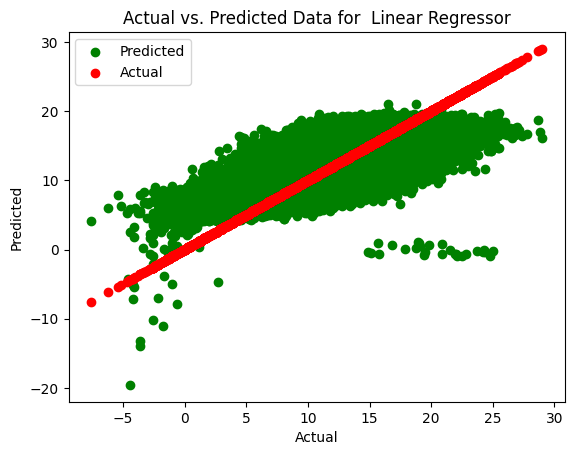

In [25]:
import matplotlib.pyplot as plt


plt.scatter(y, predictions, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for  Linear Regressor')


plt.legend()


plt.show()

Linear Regressor Using Parameter

In [26]:
modellp = LinearRegression(fit_intercept=True)


In [27]:
# Fit the model to the entire dataset
modellp.fit(X, y)


LinearRegression()

In [28]:
modellp.score(X,y)

0.49516782547322113

In [29]:
predictionslp = modellp.predict(X)

In [30]:
mae = mean_absolute_error(y, predictionslp)
print("MAE:", mae)

MAE: 3.2508212298076558


In [31]:
# Calculate RMSE
rmse = mean_squared_error(y, predictionslp)
print("RMSE:", rmse)

RMSE: 16.40620078564364


In [32]:
# Calculate R2 score
r2 = r2_score(y, predictionslp)
print("R2 score:", r2)


R2 score: 0.49516782547322113


In [33]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):

  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = modellp.predict(input)[0]

  return str(prediction)

In [34]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-5.3672635370580295'

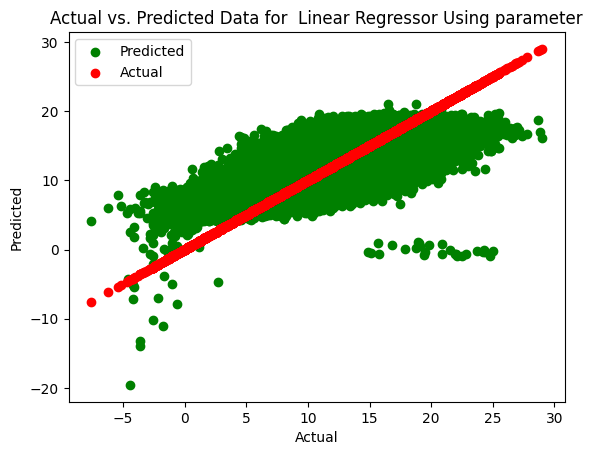

In [35]:
import matplotlib.pyplot as plt


plt.scatter(y, predictionslp, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for  Linear Regressor Using parameter')


plt.legend()


plt.show()

In [36]:
## Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
modelrp = RandomForestRegressor()

In [37]:
# Fit the model to the entire dataset
modelrp.fit(X, y)

RandomForestRegressor()

In [38]:
modelrp.score(X,y)

0.9364438373365127

In [39]:
predictionsrp = modelrp.predict(X); predictionsrp = modelrp.predict(X)


In [40]:
mae = mean_absolute_error(y, predictionsrp)
print("MAE:", mae)

MAE: 1.1395279450160474


In [41]:
# Calculate RMSE
rmse = mean_squared_error(y, predictionsrp)
print("RMSE:", rmse)

RMSE: 2.0654689190514146


In [42]:
# Calculate R2 score
r2 = r2_score(y, predictionsrp)
print("R2 score:", r2)

R2 score: 0.9364438373365127


In [43]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):

  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = modelrp.predict(input)[0]

  return str(prediction)

In [44]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-3.396000000000001'

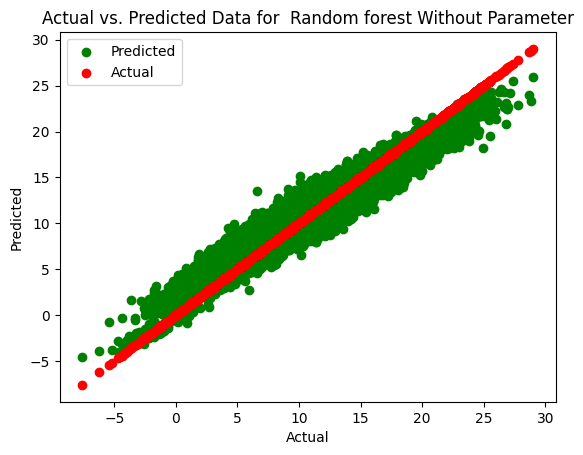

In [45]:
import matplotlib.pyplot as plt


plt.scatter(y, predictionsrp, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for  Random forest Without Parameter')


plt.legend()


plt.show()

Random Forest With Parameter

In [47]:
Regressor = RandomForestRegressor(n_estimators=100,random_state=0)

In [48]:
# Fit the model to the entire dataset
Regressor.fit(X, y)

RandomForestRegressor(random_state=0)

In [49]:
Regressor.score(X,y)

0.9357081361834918

In [50]:
predict = Regressor.predict(X)


In [51]:
mae = mean_absolute_error(y, predict)
print("MAE:", mae)

MAE: 1.1438330002614352


In [52]:
# Calculate RMSE
rmse = mean_squared_error(y, predict)
print("RMSE:", rmse)


RMSE: 2.08937797525609


In [53]:
# Calculate R2 score
r2 = r2_score(y, predict)
print("R2 score:", r2)

R2 score: 0.9357081361834918


In [54]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):

  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = Regressor.predict(input)[0]

  return str(prediction)

In [55]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-3.4570000000000034'

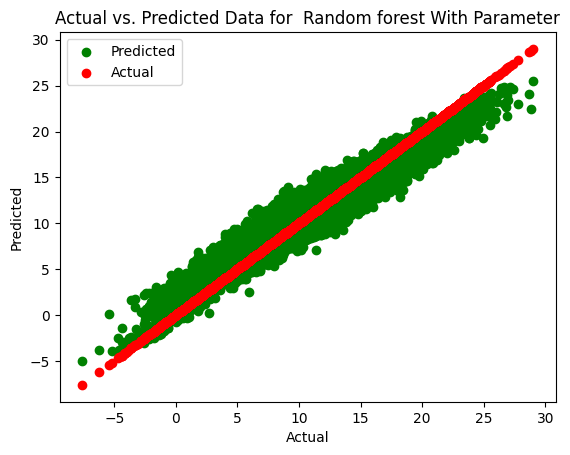

In [56]:
import matplotlib.pyplot as plt


plt.scatter(y, predict, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for  Random forest With Parameter')


plt.legend()


plt.show()

Decision Tree Without Parameter

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
tree = DecisionTreeRegressor()

In [59]:
# Fit the model to the entire dataset
tree.fit(X, y)


DecisionTreeRegressor()

In [60]:
tree.score(X,y)

0.9996548443520936

In [61]:
pre = tree.predict(X)


In [62]:
mae = mean_absolute_error(y, pre)
print("MAE:", mae)

MAE: 0.0051482096847985746


In [63]:
# Calculate RMSE
rmse = mean_squared_error(y, pre)
print("RMSE:", rmse)

RMSE: 0.011216980904909824


In [64]:
# Calculate R2 score
r2 = r2_score(y, pre)
print("R2 score:", r2)

R2 score: 0.9996548443520936


In [65]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):

  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = tree.predict(input)[0]

  return str(prediction)

In [66]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-4.1'

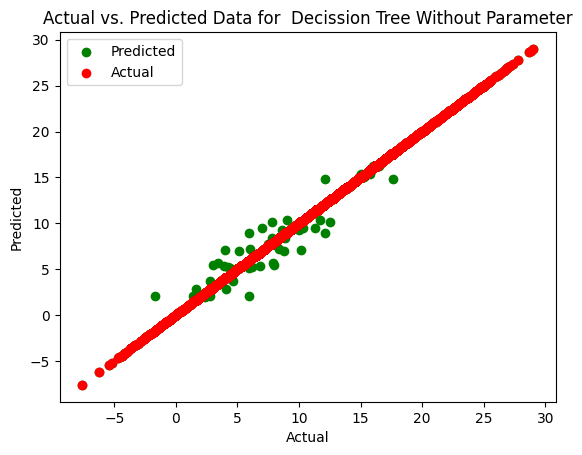

In [67]:
import matplotlib.pyplot as plt


plt.scatter(y, pre, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for  Decission Tree Without Parameter')


plt.legend()


plt.show()

Decision Tree With Parameter

In [68]:
trees = DecisionTreeRegressor(max_depth=3)

In [69]:
# Fit the model to the entire dataset
trees.fit(X, y)


DecisionTreeRegressor(max_depth=3)

In [70]:
trees.score(X,y)

0.4540741077336129

In [71]:
pr = trees.predict(X)

In [72]:
mae = mean_absolute_error(y, pr)
print("MAE:", mae)

MAE: 3.3681374260203563


In [73]:
# Calculate RMSE
rmse = mean_squared_error(y, pr)
print("RMSE:", rmse)

RMSE: 17.74167783778786


In [74]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):

  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = trees.predict(input)[0]

  return str(prediction)

In [75]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-2.3454545454545457'

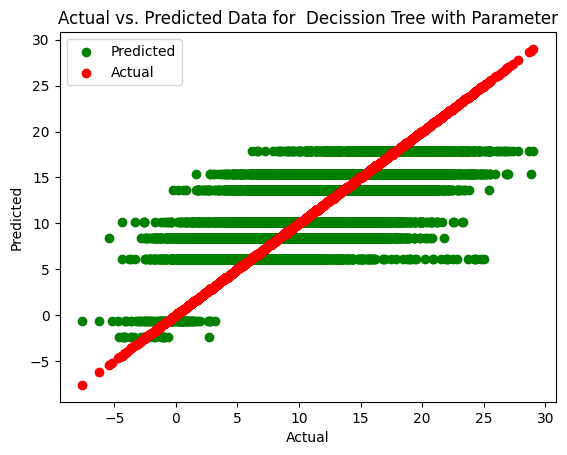

In [76]:
import matplotlib.pyplot as plt


plt.scatter(y, pr, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for  Decission Tree with Parameter')


plt.legend()


plt.show()

CNN Model

In [77]:
import tensorflow as tf
cnn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
cnn.compile(optimizer='adam', loss='mean_squared_error')

In [79]:
# Train the model on the entire dataset
history = cnn.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2358272.0000 - val_loss: 32.2688
Epoch 2/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 28.1164 - val_loss: 26.1425
Epoch 3/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26.0942 - val_loss: 24.6028
Epoch 4/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23.5834 - val_loss: 40.9514
Epoch 5/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.3252 - val_loss: 21.4070
Epoch 6/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.7733 - val_loss: 21.4820
Epoch 7/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.0600 - val_loss: 24.9871
Epoch 8/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20.7093 - val_loss: 19.8787
Epoch 9/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20.9906 - val_loss: 44.1690
Epoch 10/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.6131 - val_loss: 25.0210
Epoch 11/50
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.0465 - val_loss: 39.5308
Epoch 12/50
347/347 ━━━━━

In [80]:
loss = cnn.evaluate(X, y)
print("Test loss:", loss)

433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 111.0896
Test loss: 101.03459930419922


In [81]:
# Evaluate the model on the entire dataset
loss = cnn.evaluate(X, y)
rmse = np.sqrt(loss)
print("RMSE:", rmse)

433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 111.0896
RMSE: 10.051596853445686


In [82]:
new= cnn.predict(X)

433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [83]:
mae = mean_absolute_error(y, new)
print("MAE:", mae)

MAE: 9.24635555465933


In [84]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):

  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = cnn.predict(input)[0]

  return str(prediction)

In [85]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'[5.666519]'

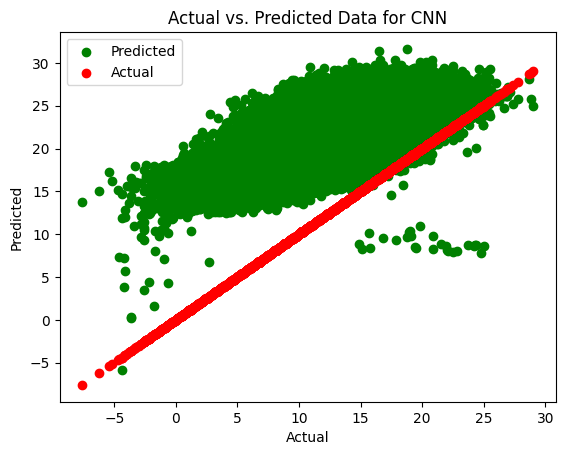

In [86]:
import matplotlib.pyplot as plt


plt.scatter(y, new, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for CNN')


plt.legend()


plt.show()

Adaboost Algorithm

In [87]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_reg = AdaBoostRegressor()
adaboost_reg.fit(X, y)
adaboost_reg.score(X,y)

0.501845020122607

In [88]:
adaboost_predictions = adaboost_reg.predict(X)
mae = mean_absolute_error(y, adaboost_predictions)
print("MAE:", mae)
# Calculate RMSE
rmse = mean_squared_error(y, adaboost_predictions)
print("RMSE:", rmse)

MAE: 3.2858727057532318
RMSE: 16.18920313448296


In [89]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):

  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = adaboost_reg.predict(input)[0]

  return str(prediction)

In [90]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'3.889864382583858'

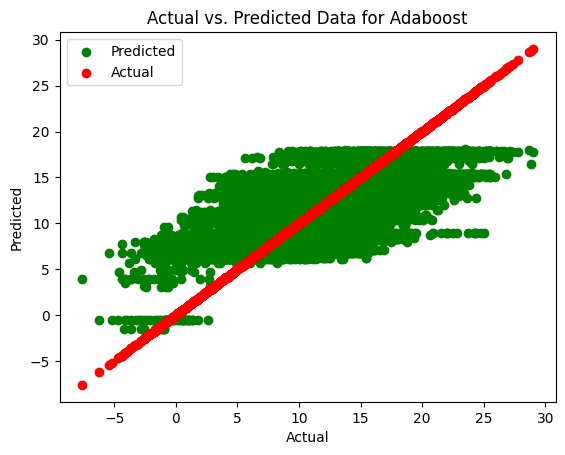

In [91]:
import matplotlib.pyplot as plt


plt.scatter(y, adaboost_predictions, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for Adaboost')


plt.legend()


plt.show()

Ensemble Model

In [93]:
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error



linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
adaboost_reg = AdaBoostRegressor()
svm_reg = SVR(kernel='linear')



# Create the ensemble model
ensemble_model = VotingRegressor([
    ('linear', linear_reg),
    ('tree', decision_tree),
    ('forest', random_forest),
    ('svm', svm_reg),
    ('adaboost', adaboost_reg)
])

# Fit the ensemble model to the data
ensemble_model.fit(X, y)
ensemble_model.score(X, y)

-2235.616214251344

In [94]:
# Make predictions using the ensemble model
predictions = ensemble_model.predict(X)

# Evaluate the ensemble model
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

print("Ensemble Model Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Ensemble Model Performance:
Mean Absolute Error (MAE): 208.85698999153888
Root Mean Squared Error (RMSE): 269.603938704825


In [95]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):

  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = ensemble_model.predict(input)[0]

  return str(prediction)

In [96]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-109.61804678648699'

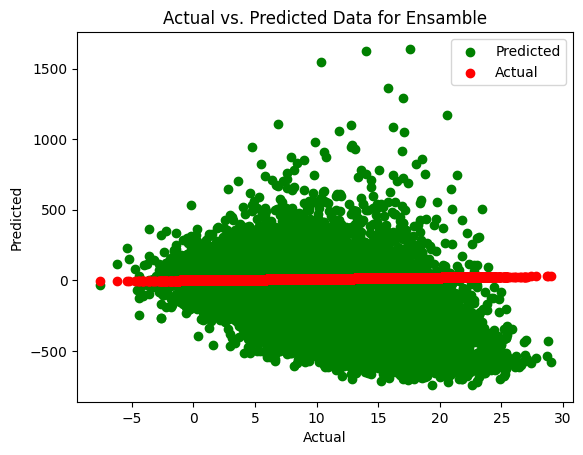

In [97]:
import matplotlib.pyplot as plt


plt.scatter(y, predictions, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for Ensamble')


plt.legend()


plt.show()

SVR without Parameter

In [98]:
svm=SVR()

In [99]:
svm.fit(X,y)

SVR()

In [100]:
svm.score(X,y)

0.0016092661728001056

In [101]:
prsvm = Regressor.predict(X)

In [102]:
mae = mean_absolute_error(y, prsvm)
print("MAE:", mae)

MAE: 1.1438330002614352


In [103]:
# Calculate RMSE
rmse = mean_squared_error(y, prsvm)
print("RMSE:", rmse)

RMSE: 2.08937797525609


In [104]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):

  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = svm.predict(input)[0]

  return str(prediction)

In [105]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'10.873551999863663'

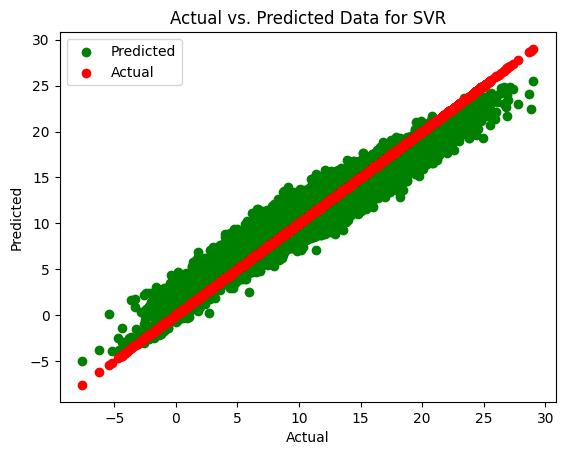

In [106]:
import matplotlib.pyplot as plt


plt.scatter(y, prsvm, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for SVR')


plt.legend()


plt.show()

SVR with Parameter

In [107]:
svmp=SVR(kernel='linear')

In [108]:
svmp.fit(X,y)


SVR(kernel='linear')

In [109]:
svmp.score(X,y)

-55911.55005764094

In [111]:
rsvm = Regressor.predict(X)

In [112]:
mae = mean_absolute_error(y, rsvm)
print("MAE:", mae)

MAE: 1.1438330002614352


In [113]:
# Calculate RMSE
rmse = mean_squared_error(y, rsvm)
print("RMSE:", rmse)

RMSE: 2.08937797525609


In [114]:
def predict_weather( cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth):

  input = pd.DataFrame([[ cloud_cover, sunshine, global_radiation, precipitation, pressure, snow_depth]], columns=['cloud_cover', 'sunshine', 'global_radiation',  'precipitation', 'pressure', 'snow_depth'])
  prediction = svmp.predict(input)[0]

  return str(prediction)

In [115]:
predict_weather(2.0, 7, 52.0, 0.4, 101900.0, 9.0)

'-536.9158347279808'

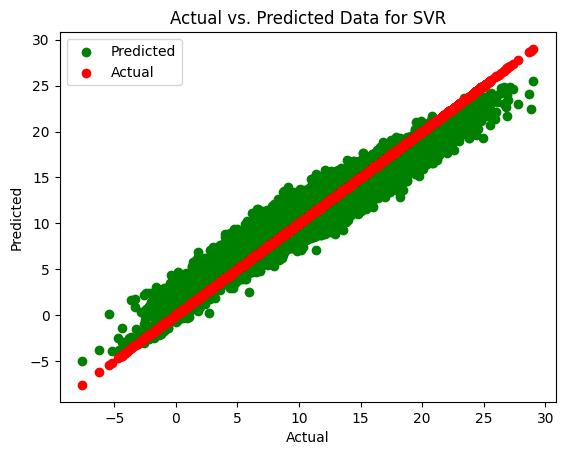

In [116]:
import matplotlib.pyplot as plt


plt.scatter(y, rsvm, color='green', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Data for SVR')


plt.legend()


plt.show()

Feature Selection

Linear

In [117]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

data = pd.read_csv('/content/drive/MyDrive/london_weather.csv')

features = ['cloud_cover', 'sunshine', 'global_radiation', 'precipitation', 'pressure', 'snow_depth']
target = 'mean_temp'
X = data[features]
y = data[target]

data_cleaned = data.dropna(subset=[target])
X = data_cleaned[features]
y = data_cleaned[target]

imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X_imputed, y)

model = LinearRegression()

model.fit(X_selected, y)

predictions = model.predict(X_selected)

mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3.298047861137362
Root Mean Squared Error (RMSE): 4.103791139420477


#Random Forest

In [118]:
data_cleaned = data.dropna(subset=[target])
X = data_cleaned[features]
y = data_cleaned[target]
imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)

selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X_imputed, y)

model = RandomForestRegressor()

model.fit(X_selected, y)

predictions = model.predict(X_selected)

mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))


print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 1.9813523617541173
Root Mean Squared Error (RMSE): 2.5833039911660296


#Decission Tree

In [119]:
data_cleaned = data.dropna(subset=[target])
X = data_cleaned[features]
y = data_cleaned[target]

imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)

selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X_imputed, y)


model = DecisionTreeRegressor()
model.fit(X_selected, y)


predictions = model.predict(X_selected)


mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 1.4393797483070483
Root Mean Squared Error (RMSE): 2.3457448238893295


#Adaboost

In [120]:
data_cleaned = data.dropna(subset=[target])
X = data_cleaned[features]
y = data_cleaned[target]


imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)

selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X_imputed, y)


model = AdaBoostRegressor()


model.fit(X_selected, y)


predictions = model.predict(X_selected)


mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))


print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3.346656269241311
Root Mean Squared Error (RMSE): 4.085443149612202


#SVR

In [123]:
# Reduce data size to a manageable subset
data_cleaned = data.dropna(subset=[target])  # Drop rows with missing target values
X = data_cleaned[features]
y = data_cleaned[target]

# Subsample for testing (keep this manageable; adjust 'n' based on your hardware)
if len(X) > 10000:  # Limit to 10,000 rows for faster processing
    X = X.sample(n=10000, random_state=42)
    y = y.sample(n=10000, random_state=42)

# Impute missing values
X = SimpleImputer(strategy="mean").fit_transform(X)

# Feature selection (select only the top 5 features for speed)
X = SelectKBest(score_func=f_regression, k=5).fit_transform(X, y)

# Train a simple linear regression model (much faster than SVR)
model = LinearRegression()
model.fit(X, y)

# Predictions
predictions = model.predict(X)

# Evaluation
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3.2812256816712404
Root Mean Squared Error (RMSE): 4.0735318940763605


In [124]:
#data_cleaned = data.dropna(subset=[target])
#X = data_cleaned[features]
#y = data_cleaned[target]
#imputer = SimpleImputer()
#X_imputed = imputer.fit_transform(X)
#selector = SelectKBest(score_func=f_regression, k=3)
#X_selected = selector.fit_transform(X_imputed, y)
#model = SVR(kernel='linear')
#model.fit(X_selected, y)
#predictions = model.predict(X_selected)
#mae = mean_absolute_error(y, predictions)
#rmse = np.sqrt(mean_squared_error(y, predictions))
#print("Mean Absolute Error (MAE):", mae)
#print("Root Mean Squared Error (RMSE):", rmse)


#Explore The Data

In [125]:
import plotly
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import calendar

#Heatmap for all data

<Axes: >

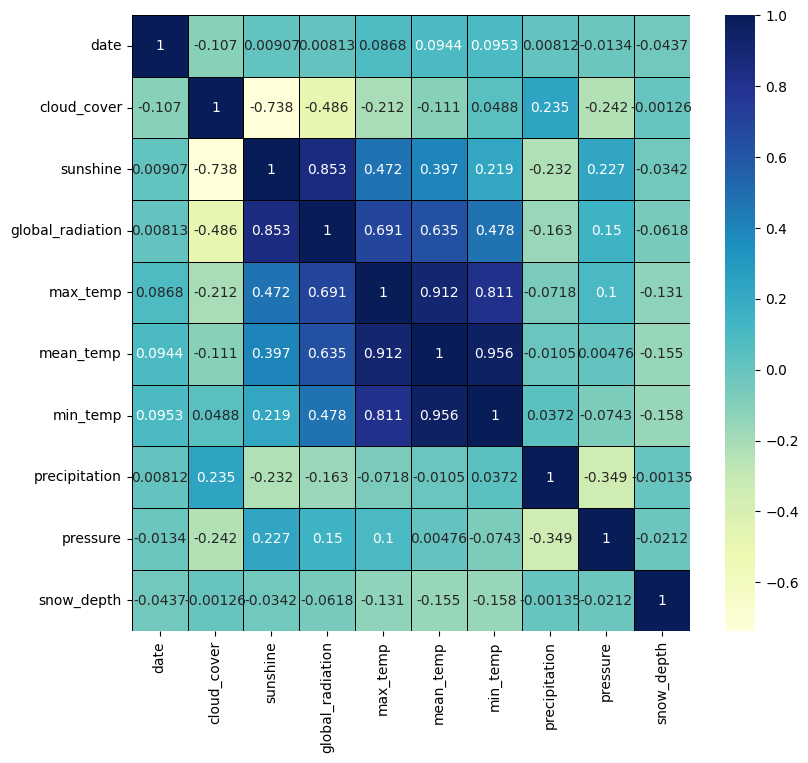

In [126]:
plt.figure(figsize=(9,8))
sns.heatmap(d1.corr(), fmt='.3g', linecolor='black',linewidths=.5,cmap="YlGnBu" , annot=True)

#Heatmap for particular data

<Axes: >

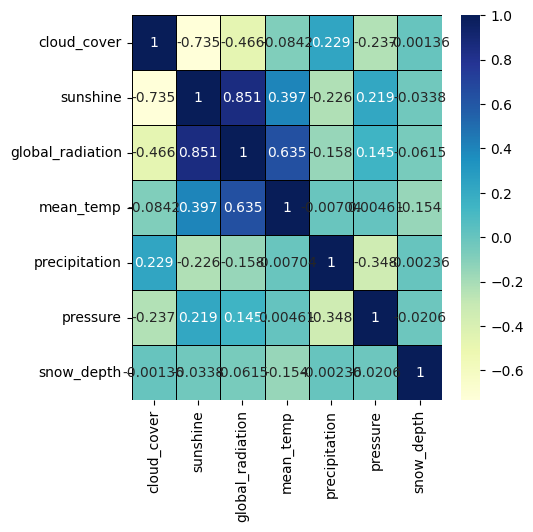

In [127]:
plt.figure(figsize=(5,5))
sns.heatmap(df2.corr(), fmt='.3g', linecolor='black',linewidths=.5,cmap="YlGnBu" , annot=True)

#Snow depth graph 1979-2020

In [128]:
d1['year'] = d1['date'].astype(str).str[:4]
d1['month'] = d1['date'].astype(str).str[4:6]
d1['date'] = d1['date'].astype(str).str[6:]

In [129]:
d1[['date', 'month', 'year']] = d1[['date', 'month', 'year']].astype(int)

In [130]:
weather_features = d1.select_dtypes(exclude = 'object').columns

In [131]:
london_weather_monthly_df = d1.groupby(['year', 'month'], as_index = False)[weather_features].mean()
london_weather_monthly_df['snow_depth'] = d1.snow_depth.fillna(0)
london_weather_monthly_df['date'] = pd.to_datetime(london_weather_monthly_df[['year', 'month']].assign(DAY = 1))
monthly_data_df1 = london_weather_monthly_df.copy()
monthly_data_df1.month = monthly_data_df1['month'].astype(int)
monthly_data_df1['month'] = monthly_data_df1['month'].apply(lambda x: calendar.month_abbr[x])

In [132]:
fig = px.scatter(monthly_data_df1, x="year", y="month", color = 'snow_depth', color_continuous_scale=['lightblue', 'mediumblue'],
	         size="snow_depth", size_max=60, opacity = 0.6, title = "Snow depth in London")
fig.update_layout(height = 600, width = 1000, plot_bgcolor = 'white')
fig.update_xaxes(title = 'Years (1979-2020)', showgrid = False, linecolor = 'dimgrey', mirror = True)
fig.update_yaxes(title = 'Months', showgrid = False, zeroline = False, linecolor = 'dimgrey', mirror = True)
fig.update_coloraxes(colorbar = dict(title = 'Snow depth(cm)'))

#Maximum Minimum and Mean Temparature Graph

In [133]:
london_weather_yearly_df = london_weather_monthly_df.groupby(['year'], as_index = False)[['max_temp', 'mean_temp', 'min_temp']].mean()


In [134]:
layout = go.Layout(
    title = "London's temperature",
    plot_bgcolor = "#FFF",
    hovermode = "x",
    hoverdistance = 100,
    spikedistance = 1000,
    xaxis=dict(
        title = "Years (1979-2020)",
        linecolor = "dimgray",
        showgrid = False,
        showspikes = True,
        spikethickness = 1,
        spikedash = 'dash',
        spikecolor = 'darkgrey',
        spikemode = 'across',
        mirror = True
    ),yaxis=dict(
        title = "Temperature(°C)",
        linecolor = "dimgray",
        mirror = True
    )
)

plot = go.Figure(data = [go.Scatter(
    x = london_weather_yearly_df.year,
    y = london_weather_yearly_df.max_temp,
    name = 'Maximum',
    mode = 'lines+markers',
    line_color = 'orange'),
    go.Scatter(
    x = london_weather_yearly_df.year,
    y = london_weather_yearly_df.mean_temp,
    name = 'Mean',
        mode = 'lines+markers',
    line = dict(color = 'silver', dash = 'longdash')),
    go.Scatter(
    x = london_weather_yearly_df.year,
    y = london_weather_yearly_df.min_temp,
    name = 'Minimum',
    mode = 'lines+markers',
    line_color = 'lightblue')
    ],
    layout = layout)
plot.show()

#London's Cloud Cover Status(1979-2020)

In [135]:
london_clouds = dict()
london_clouds['Barely cloudy'] = d1['cloud_cover'][d1['cloud_cover'].isin([0,1,2])].count()
london_clouds['Partly cloudy'] = d1['cloud_cover'][d1['cloud_cover'].isin([3,4,5])].count()
london_clouds['Mostly cloudy'] = d1['cloud_cover'][d1['cloud_cover'].isin([6,7,8])].count()
london_clouds['Obstructed view'] = d1['cloud_cover'][d1['cloud_cover'] == 9].count()

In [136]:
fig = px.pie(values=list(london_clouds.values()), names=list(london_clouds.keys()),
              title = "London's Cloud Cover Status(1979-2020)",
              color_discrete_sequence=['#afafaf', '#cfcfcf', '#efefef', '#000000'])
fig.update_layout(width = 700, legend_title_text = 'Cloud status', font = dict(size = 14))
fig.show()

## Top 5 hottest years

In [137]:
df = pd.read_csv('/content/drive/MyDrive/london_weather.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [138]:
df[['year','max_temp']].groupby('year').mean().sort_values(by='max_temp', ascending=False).head(5)


,max_temp
year,
2020,16.787778
2018,16.718630
2014,16.626575
2019,16.450137
2011,16.379726


#Top 10 lowest temp

In [139]:
df[['date', 'max_temp']].sort_values(['max_temp'],ascending=True).head(10)


,date,max_temp
2932,1987-01-11,-6.2
2206,1985-01-15,-4.0
4419,1991-02-06,-3.4
2933,1987-01-12,-3.3
2931,1987-01-10,-3.0
4421,1991-02-08,-2.5
4420,1991-02-07,-2.1
2231,1985-02-09,-1.8
1102,1982-01-07,-1.8
6574,1996-12-31,-1.7


In [141]:
#Number of days a year without rain

In [140]:
df[df['precipitation'] == 0].groupby('year').count().precipitation.sort_values(ascending=False).head(10).to_frame()


,precipitation
year,
1990,229
1997,216
1995,216
1996,215
1991,214
2003,212
1989,212
2018,210
1993,201


#Snow depth - change between 1979 and 2020



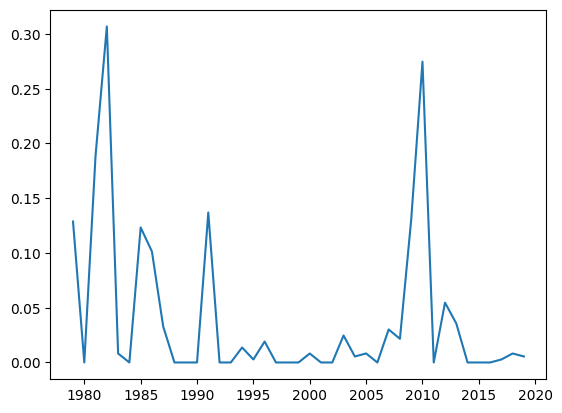

In [142]:
df.groupby('year').mean().snow_depth

plt.plot(df.groupby('year').mean().snow_depth.index, df.groupby('year').mean().snow_depth.values)
plt.show()

#Hotwaves

In [143]:
df[['date', 'max_temp']].sort_values(['max_temp'],ascending=False).head(5)


,date,max_temp
14814,2019-07-24,37.9
8986,2003-08-09,37.9
15187,2020-07-31,37.9
13329,2015-06-30,36.7
15194,2020-08-07,36.5


#Climate Analysis


##Linear Regression

In [144]:
import pandas as pd
from scipy.stats import linregress
import os

def load_and_process_data(filepath):
    """
    Load and preprocess weather data.
    """
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"The file at {filepath} does not exist. Please check the file path.")

    # Load dataset
    data = pd.read_csv(filepath)

    # Convert 'date' to datetime and extract year
    data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
    data['year'] = data['date'].dt.year

    # Aggregate yearly data
    yearly_data = data.groupby('year').agg({
        'max_temp': 'mean',
        'mean_temp': 'mean',
        'min_temp': 'mean',
        'precipitation': 'sum'
    }).reset_index()

    # Rename columns for clarity
    yearly_data.rename(columns={
        'max_temp': 'avg_max_temp',
        'mean_temp': 'avg_mean_temp',
        'min_temp': 'avg_min_temp',
        'precipitation': 'total_precipitation'
    }, inplace=True)

    return yearly_data

# Main Execution
if __name__ == "__main__":
    filepath = "/content/drive/MyDrive/london_weather.csv"  # Update this to your correct file path

    try:
        # Load and process data
        yearly_data = load_and_process_data(filepath)

        # Perform analysis or visualization here
        print(yearly_data.head())
    except FileNotFoundError as e:
        print(e)


   year  avg_max_temp  avg_mean_temp  avg_min_temp  total_precipitation
0  1979     13.759178       9.986575      6.217808                684.7
1  1980     14.176230      10.370492      6.587978                588.1
2  1981     14.063562      10.320000      6.574795                679.6
3  1982     15.004658      10.998904      7.006301                649.8
4  1983     15.248767      11.237260      7.227397                535.0


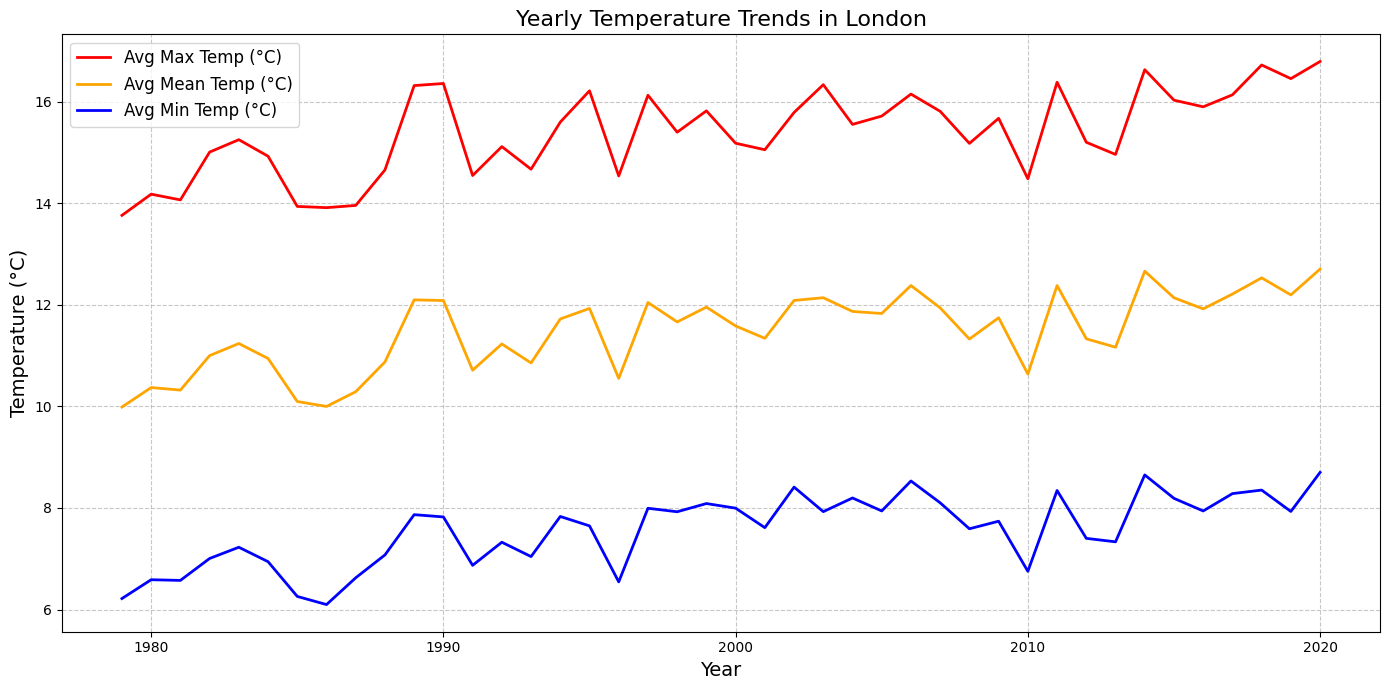

<ipython-input-149-0f92bba1295e>:60: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




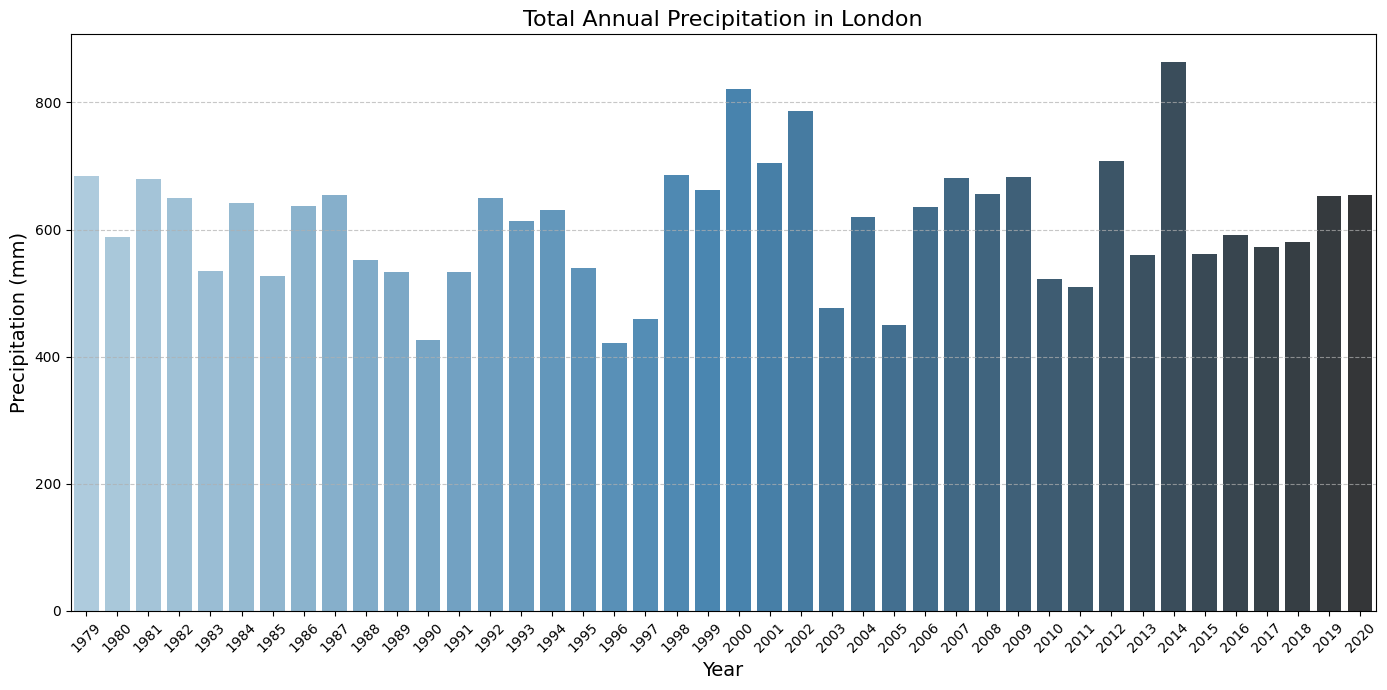

Trend Analysis for avg_max_temp:
  Slope: 0.0467
  R-squared: 0.4450
  P-value: 0.0000
  The trend is statistically significant.



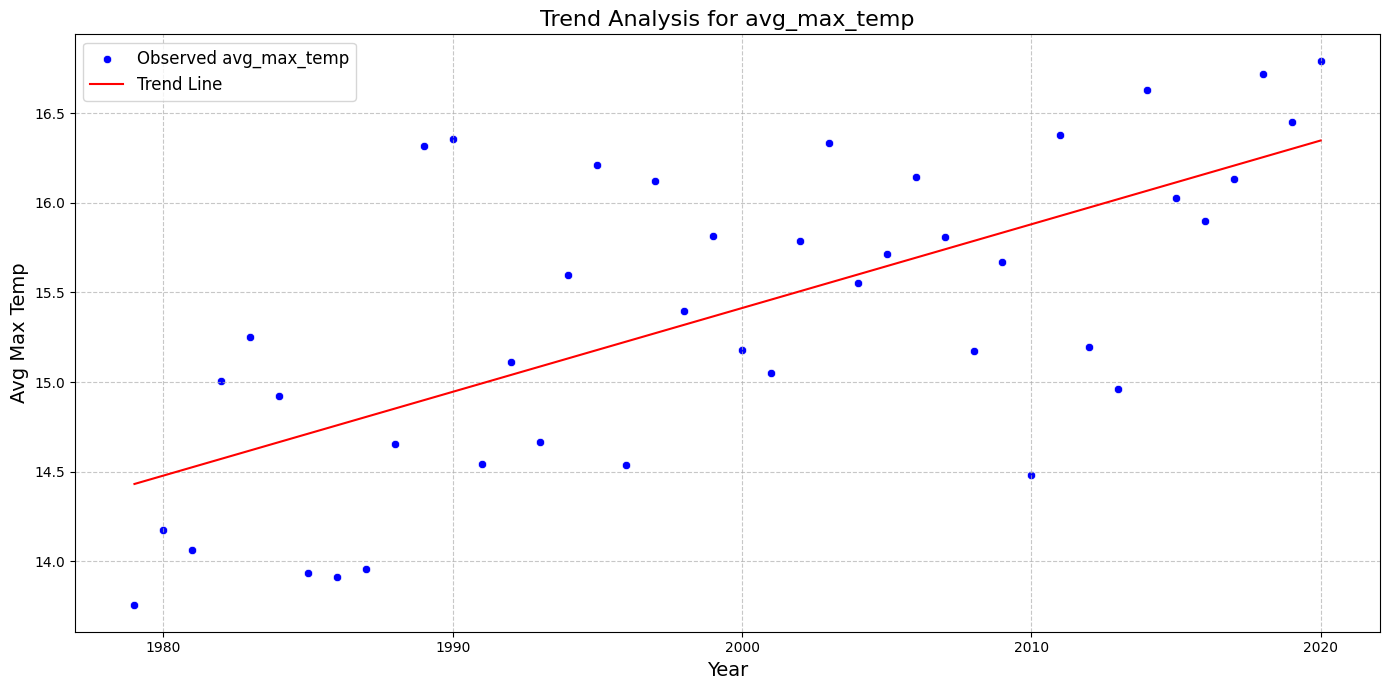

Trend Analysis for avg_mean_temp:
  Slope: 0.0443
  R-squared: 0.4994
  P-value: 0.0000
  The trend is statistically significant.



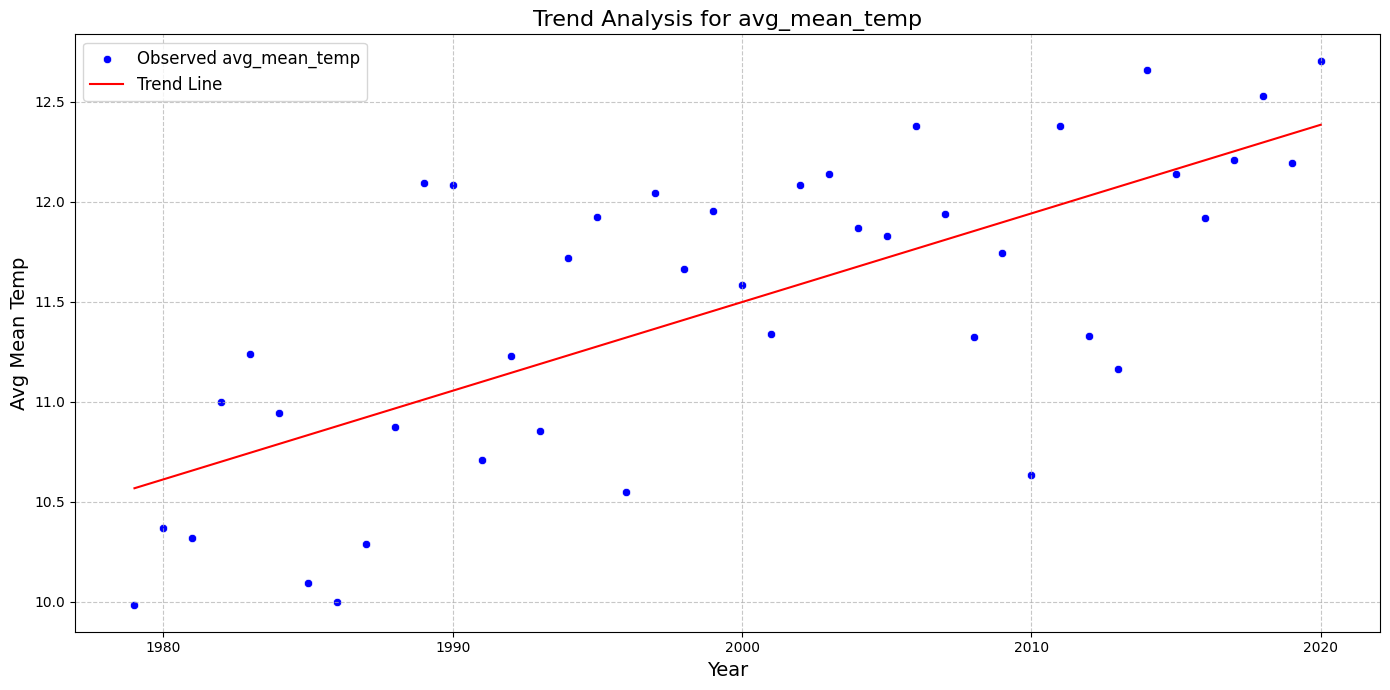

Trend Analysis for avg_min_temp:
  Slope: 0.0416
  R-squared: 0.5166
  P-value: 0.0000
  The trend is statistically significant.



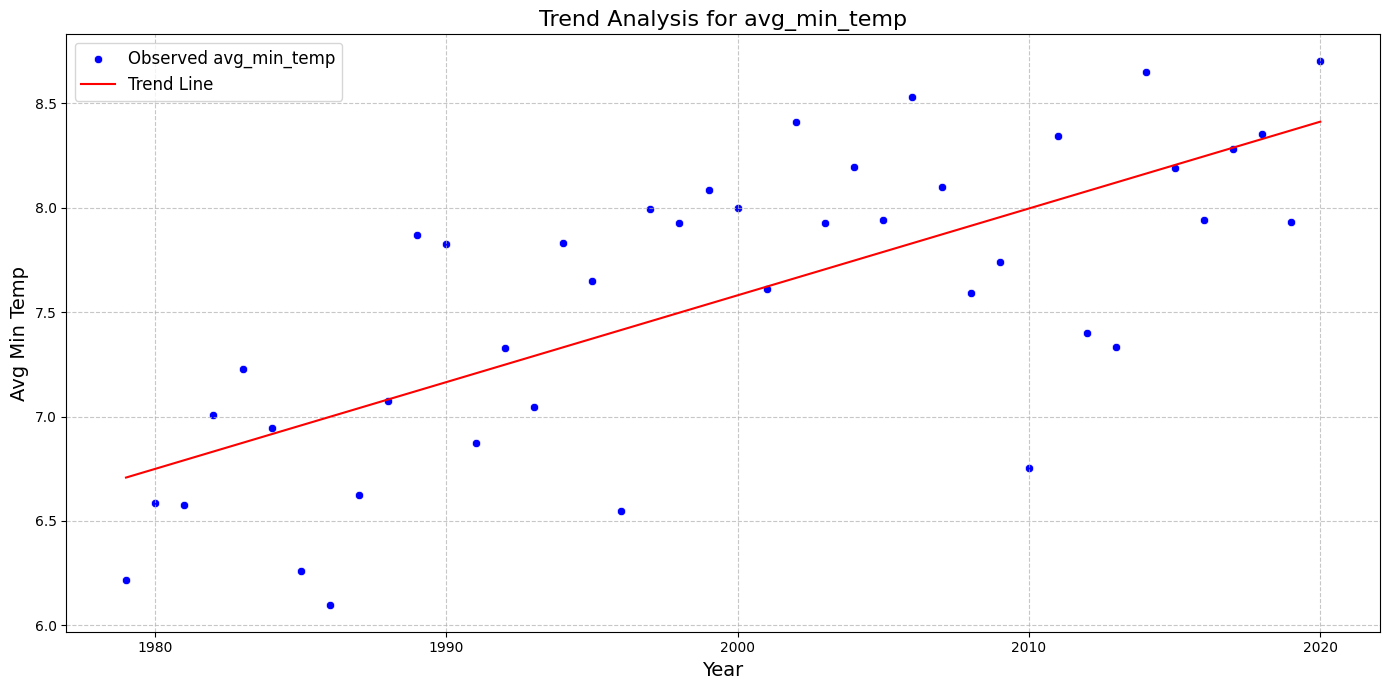

Trend Analysis for total_precipitation:
  Slope: 0.8715
  R-squared: 0.0118
  P-value: 0.4932
  The trend is not statistically significant.



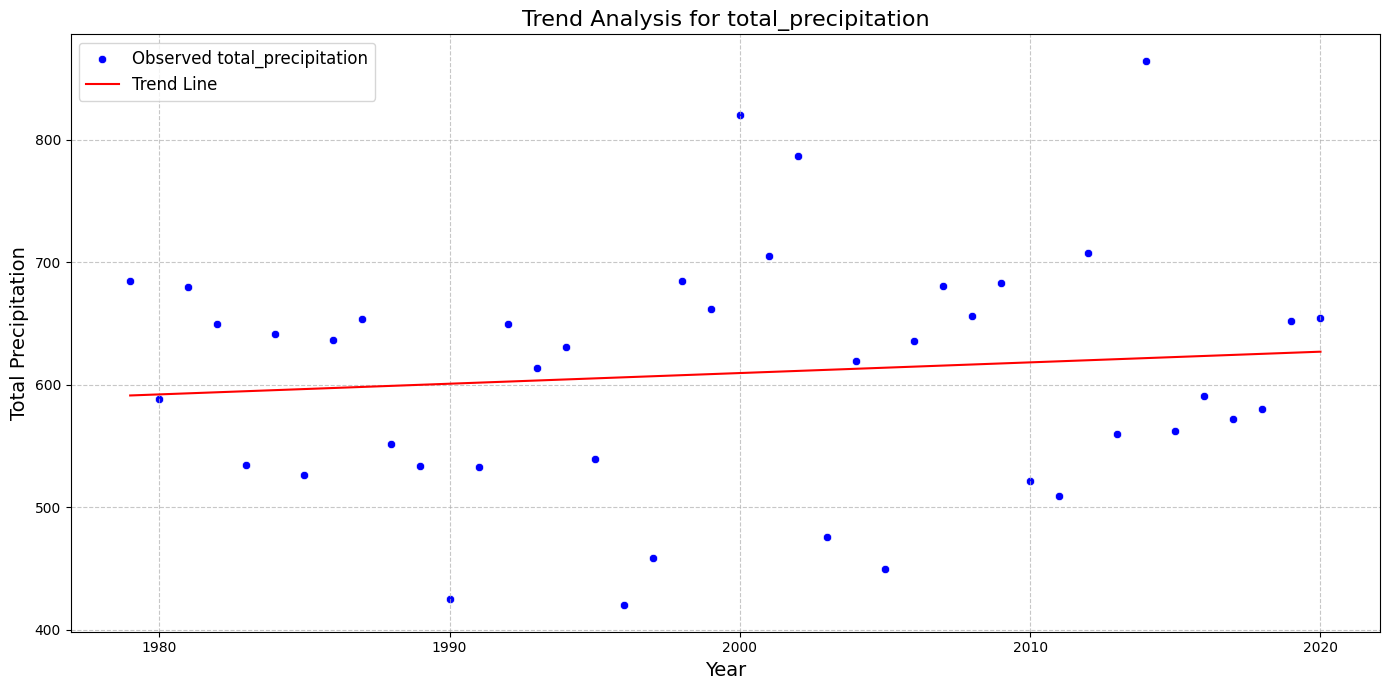

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Function to load and process the data
def load_and_process_data(filepath):
    """
    Load and preprocess weather data.
    """
    data = pd.read_csv(filepath)
    data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
    data['year'] = data['date'].dt.year
    yearly_data = data.groupby('year').agg({
        'max_temp': 'mean',
        'mean_temp': 'mean',
        'min_temp': 'mean',
        'precipitation': 'sum'
    }).reset_index()
    yearly_data.rename(columns={
        'max_temp': 'avg_max_temp',
        'mean_temp': 'avg_mean_temp',
        'min_temp': 'avg_min_temp',
        'precipitation': 'total_precipitation'
    }, inplace=True)
    return yearly_data

# Function to analyze trends
def analyze_trends(yearly_data):
    """
    Perform trend analysis using linear regression.
    """
    trend_results = {}
    for metric in ['avg_max_temp', 'avg_mean_temp', 'avg_min_temp', 'total_precipitation']:
        slope, intercept, r_value, p_value, std_err = linregress(yearly_data['year'], yearly_data[metric])
        trend_results[metric] = {
            'slope': slope,
            'intercept': intercept,
            'r_squared': r_value**2,
            'p_value': p_value
        }
    return trend_results

# Visualization Functions
def plot_temperature_trends(yearly_data):
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='year', y='avg_max_temp', data=yearly_data, label='Avg Max Temp (°C)', color='red', linewidth=2)
    sns.lineplot(x='year', y='avg_mean_temp', data=yearly_data, label='Avg Mean Temp (°C)', color='orange', linewidth=2)
    sns.lineplot(x='year', y='avg_min_temp', data=yearly_data, label='Avg Min Temp (°C)', color='blue', linewidth=2)
    plt.title('Yearly Temperature Trends in London', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Temperature (°C)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_precipitation_trends(yearly_data):
    plt.figure(figsize=(14, 7))
    sns.barplot(x='year', y='total_precipitation', data=yearly_data, palette='Blues_d')
    plt.title('Total Annual Precipitation in London', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Precipitation (mm)', fontsize=14)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_trend_line(yearly_data, metric, slope, intercept):
    plt.figure(figsize=(14, 7))
    sns.scatterplot(x='year', y=metric, data=yearly_data, color='blue', label=f'Observed {metric}')
    plt.plot(yearly_data['year'], intercept + slope * yearly_data['year'], color='red', label='Trend Line')
    plt.title(f'Trend Analysis for {metric}', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(metric.replace('_', ' ').title(), fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Main Program
if __name__ == "__main__":
    # Filepath to the dataset
    filepath = "/content/drive/MyDrive/london_weather.csv"

    # Load and process data
    yearly_data = load_and_process_data(filepath)

    # Plot temperature trends
    plot_temperature_trends(yearly_data)

    # Plot precipitation trends
    plot_precipitation_trends(yearly_data)

    # Perform trend analysis and visualize trends
    trends = analyze_trends(yearly_data)
    for metric, results in trends.items():
        print(f"Trend Analysis for {metric}:")
        print(f"  Slope: {results['slope']:.4f}")
        print(f"  R-squared: {results['r_squared']:.4f}")
        print(f"  P-value: {results['p_value']:.4f}")
        if results['p_value'] < 0.05:
            print("  The trend is statistically significant.\n")
        else:
            print("  The trend is not statistically significant.\n")
        plot_trend_line(yearly_data, metric, results['slope'], results['intercept'])
